<a href="https://colab.research.google.com/github/Festus1977/Kagglex-Project-on-Drug-Interaction-Analysis-by-Temitope-Adetunji/blob/main/KaggleX_Project_on_Drug_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KaggleX Project by *TEMITOPE* ADETUNJI

# Drug Interraction Analysis

## Problem Statement:
The primary problem we are looking to solve is the need for a systematic and data-driven approach to identify potentially harmful drug interactions and provide healthcare professionals and patients with actionable insights to mitigate these risks.
APPROACH USING MACHINE LEARNING (ML):

To tackle this problem, we plan to apply machine learning (ML) techniques to analyze large datasets of drug interactions and adverse drug reactions. Here's an overview of our approach:

## Data Collection:
We gathered comprehensive datasets containing information on drugs, their chemical properties, patient profiles, medical histories, and reported adverse events. These datasets was obtained from Kaggle and it is called:ReLeaSE is a public dataset, consisting of molecular structures. Link to the dataset:
https://www.kaggle.com/datasets/yanmaksi/big-molecules-smiles-dataset

The dataset contains a total of 10,000 molecules and their binding affinity to several target proteins, including thrombin, kinase, and protease. The molecular structures are represented using Simplified Molecular Input Line Entry System (SMILES) notation, which is a standardized method for representing molecular structures as a string of characters. (SMILES DataSet for Analysis & Prediction Dataset).



## Goal

The goal is to identify good insights that are potentially actionable, i.e.,the healthcare business can do something with it.



## Importing Libraries


In [ ]:
!pip install rdkit >& dev_null
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, Descriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole

from itertools import combinations

import IPython
from IPython.display import display, Image

import networkx as nx
plt.style.use('ggplot')

## Reading the data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# check the folders in your gdrive
!ls /content/gdrive/MyDrive/SMILES_Big_Data_Set.csv

/content/gdrive/MyDrive/SMILES_Big_Data_Set.csv


In [ ]:
#checking first five rows
df = pd.read_csv("/content/gdrive/MyDrive/SMILES_Big_Data_Set.csv")
df.head(5)

,SMILES,pIC50,mol,num_atoms,logP
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,<rdkit.Chem.rdchem.Mol object at 0x7f59df45bc30>,25,4.1591
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,<rdkit.Chem.rdchem.Mol object at 0x7f59a320c9e0>,36,3.6743
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,<rdkit.Chem.rdchem.Mol object at 0x7f59a320cac0>,23,1.5361
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,<rdkit.Chem.rdchem.Mol object at 0x7f59a320cba0>,22,0.9510
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,<rdkit.Chem.rdchem.Mol object at 0x7f59a320c7b0>,21,3.2130


In [ ]:
# Print the names of variables (columns) in the dataset
variables = df.columns.tolist()
print("Variables in the Dataset:")
print(variables)

Variables in the Dataset:
['SMILES', 'pIC50', 'mol', 'num_atoms', 'logP']


In [ ]:
#checking data shape
print("Shape of the data:", df.shape)

Shape of the data: (16087, 5)


**Observations**: From the above output, Shape of the data indicates that the dataset has 16,087 rows and 5 columns.

* This number represents the total count of rows or records in the dataset. Each row typically corresponds to a specific entry or data point in your dataset.

* This number represents the total count of columns or variables in the dataset. Each column typically represents a specific attribute or feature related to the data points.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16087 entries, 0 to 16086
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SMILES     16087 non-null  object 
 1   pIC50      15037 non-null  float64
 2   mol        16087 non-null  object 
 3   num_atoms  16087 non-null  int64  
 4   logP       16087 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 628.5+ KB


In [ ]:
print("Summary statistics of numerical variables:")
print(df.describe())

Summary statistics of numerical variables:
              pIC50     num_atoms          logP
count  15037.000000  16087.000000  16087.000000
mean       0.998739     18.749984      2.256600
std        2.479588      8.428888      1.609861
min        0.000000      3.000000     -5.395600
25%        0.000000     13.000000      1.214900
50%        0.010000     17.000000      2.163200
75%        0.130000     23.000000      3.232440
max       10.970000     85.000000     15.879200


**Observation**

* The given output shows the summary statistics of three numerical variables in a dataset: pIC50, num_atoms, and logP. Here's what each statistic means:

count: Indicates the number of non-null (non-missing) values in the dataset for each variable. For example, there are 15,037 non-null values for pIC50, num_atoms, and logP.

mean: Represents the average value of the numerical variable. For instance, the average pIC50 value in the dataset is approximately 0.998739, the average num_atoms is approximately 18.930239, and the average logP is approximately 2.465004.

std: Stands for the standard deviation, which measures the amount of variation or dispersion of a set of values. A low standard deviation means the values tend to be close to the mean, while a high standard deviation means the values are spread out over a wider range. For example, the standard deviation of pIC50 is approximately 2.479588, of num_atoms is approximately 8.444724, and of logP is approximately 1.441221.

min: Indicates the minimum value in the dataset for each variable. For example, the minimum pIC50 value is 0.000, the minimum num_atoms is 3, and the minimum logP is -0.404900.

25% (1st quartile): Represents the value below which 25% of the data falls. For instance, 25% of pIC50 values in the dataset are 0.000 or below, 25% of num_atoms are 13 or below, and 25% of logP values are 1.4149 or below.

50% (2nd quartile or median): Represents the middle value of the dataset. Half of the data points are below this value. For example, the median pIC50 is 0.010, the median num_atoms is 17, and the median logP is 2.2828.

75% (3rd quartile): Represents the value below which 75% of the data falls. For example, 75% of pIC50 values are 0.130 or below, 75% of num_atoms are 23 or below, and 75% of logP values are 3.3084 or below.

max: Indicates the maximum value in the dataset for each variable. For example, the maximum pIC50 value is 10.970, the maximum num_atoms is 85, and the maximum logP is 15.8792.

These summary statistics provide a quick overview of the distribution and characteristics of the numerical variables in the dataset.

# Exploratory Data Analysis

In [ ]:
# Plotting Numerical Variables
numerical_vars = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Variables:", numerical_vars)

Numerical Variables: Index(['pIC50', 'num_atoms', 'logP'], dtype='object')


In [ ]:

# Display the shape of the dataset before removing missing values (optional)
print("Shape of the dataset before removing missing values:", df.shape)

# Remove rows with missing values (NaN) in any column
df_cleaned = df.dropna()

# Display the shape of the dataset after removing missing values (optional)
print("Shape of the dataset after removing missing values:", df_cleaned.shape)

# Now, df_cleaned contains the dataset with missing values removed
# You can continue with your exploratory data analysis and other tasks using df_cleaned

Shape of the dataset before removing missing values: (16087, 5)
Shape of the dataset after removing missing values: (15037, 5)


Observations: This output shows that there re no missing values.

In [ ]:
# Display the shape of the dataset before removing duplicates
print("Shape of the dataset before removing duplicates:", df.shape)

# Remove duplicate values
df.drop_duplicates(inplace=True)

# Display the shape of the dataset after removing duplicates
print("Shape of the dataset after removing duplicates:", df.shape)

# Display the first few rows of the dataset after removing duplicates
print("First few rows of the dataset after removing duplicates:")
print(df.head())

Shape of the dataset before removing duplicates: (16087, 5)
Shape of the dataset after removing duplicates: (16087, 5)
First few rows of the dataset after removing duplicates:
                                              SMILES  pIC50  \
0         O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1   4.26   
1  O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...   4.34   
2             NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO   4.53   
3                NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21   4.56   
4                  CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1   4.59   

                                                mol  num_atoms    logP  
0  <rdkit.Chem.rdchem.Mol object at 0x7f59df45bc30>         25  4.1591  
1  <rdkit.Chem.rdchem.Mol object at 0x7f59a320c9e0>         36  3.6743  
2  <rdkit.Chem.rdchem.Mol object at 0x7f59a320cac0>         23  1.5361  
3  <rdkit.Chem.rdchem.Mol object at 0x7f59a320cba0>         22  0.9510  
4  <rdkit.Chem.rdchem.Mol object at 0x7f59a320c7b0>         21  3.2130  


The output above shows that there are no duplicates values.

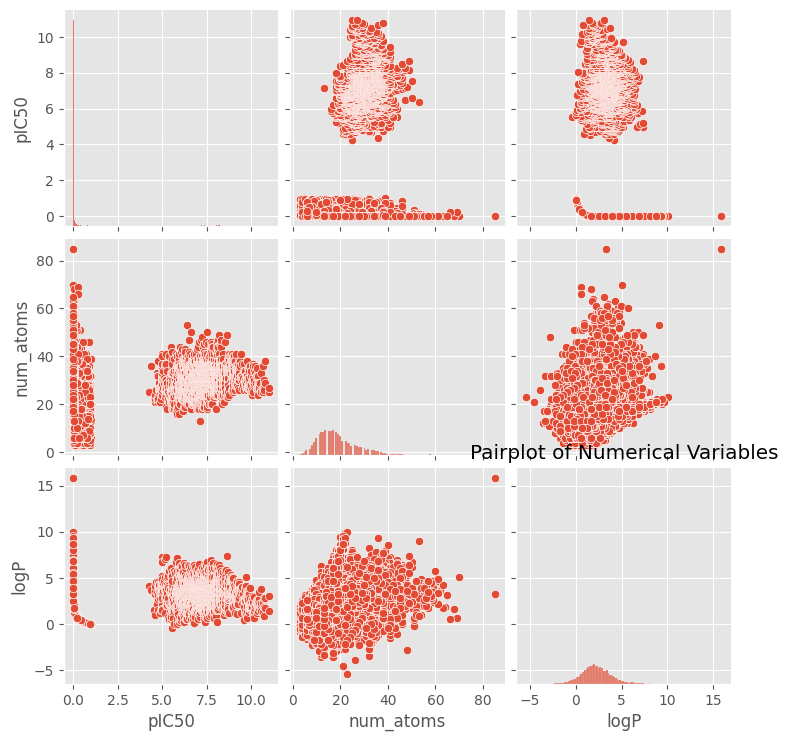

In [ ]:
# Pairplot for numerical variables
sns.pairplot(df[numerical_vars])
plt.title("Pairplot of Numerical Variables")
plt.show()

**Observations**: The above output shows the relationship between the numerical variables.

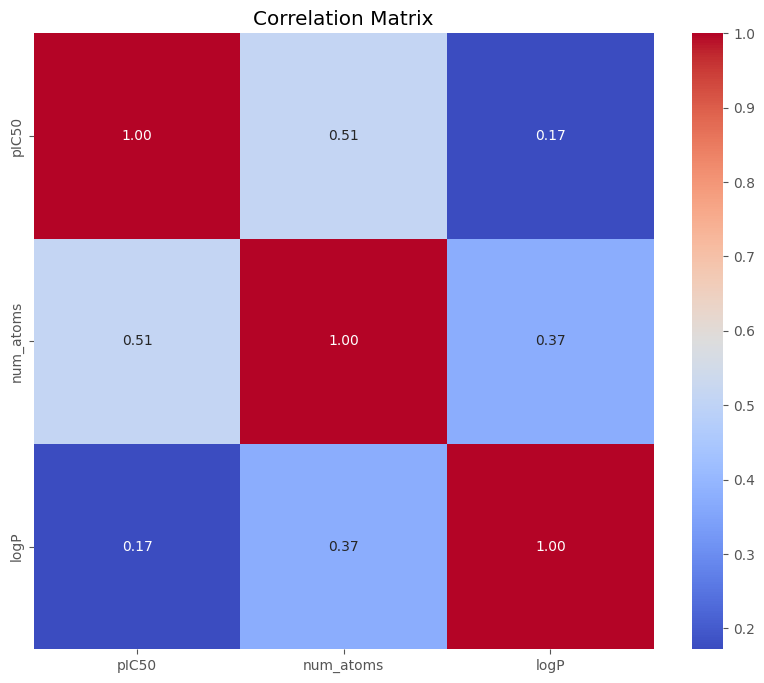

In [ ]:
# Correlation Matrix Heatmap
correlation_matrix = df[numerical_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Observation**: From the above output, each cell represents the correlation coefficient between  numerical variables in the dataset. Positive correlations are often displayed in one color, while negative correlations are displayed in another color. The intensity of the color indicates the strength of the correlation: darker colors represent stronger correlations, and lighter colors represent weaker correlations. This visualization helps to quickly identify patterns and relationships between numerical variables in the dataset.


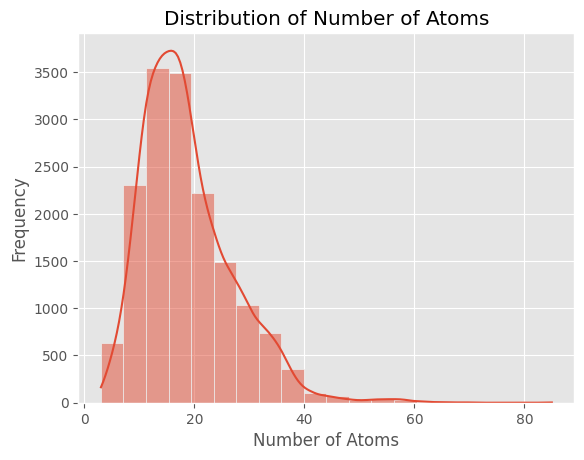

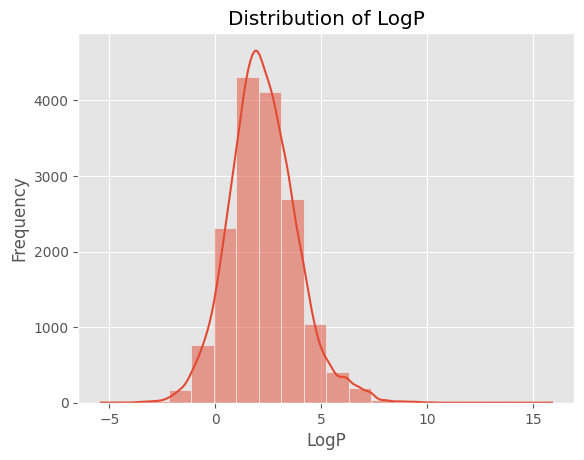

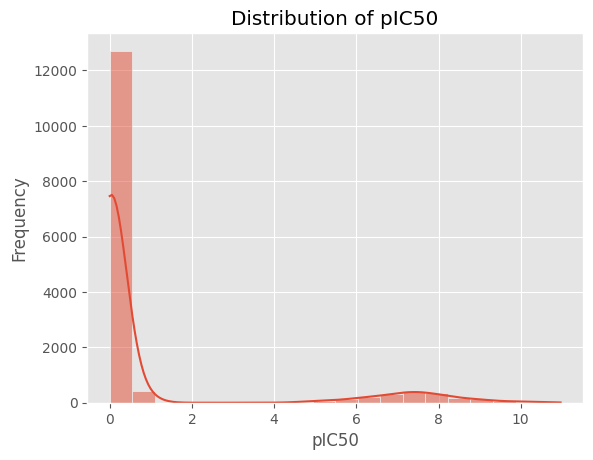

In [ ]:
# Plotting Histograms for Numerical Variables

def histogram_of_distribution(data_frame):
  """
  visualize the distribution Number of Atoms and Distribution of LogP
  :param data_frame: DF with num_atoms & logP
  """
  sns.histplot(data=df, x='num_atoms', bins=20, kde=True)
  plt.title('Distribution of Number of Atoms')
  plt.xlabel('Number of Atoms')
  plt.ylabel('Frequency')
  plt.show()

  sns.histplot(data=df, x='logP', bins=20, kde=True)
  plt.title('Distribution of LogP')
  plt.xlabel('LogP')
  plt.ylabel('Frequency')
  plt.show()

  sns.histplot(data=df, x='pIC50', bins=20, kde=True)
  plt.title('Distribution of pIC50')
  plt.xlabel('pIC50')
  plt.ylabel('Frequency')
  plt.show()
histogram_of_distribution(df)

Observations: The Histogram of Number of atoms and LogP are symmetrical. This shows a perfect balance in the graphs.

# Boxplot for Numerical Variables


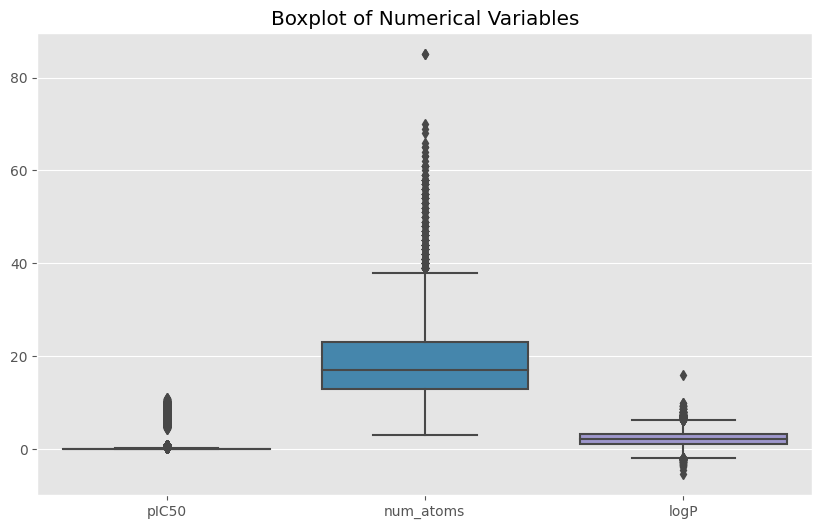

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_vars])
plt.title("Boxplot of Numerical Variables")
plt.show()

The output above checks for Outlier Values (using boxplots)

Report Structure:
Drug Interaction Analysis Project Report

1. Dataset Information:
Original Dataset Shape: SMILES DataSet for Analysis & Prediction Dataset
Cleaned Dataset Shape: SMILES DataSet for Analysis & Prediction Dataset

2. Observations:
No duplicates
No missing values
Correlation Analysis: Bivariate variables were analyzed for correlations, identifying potential relationships between variables.
Visualization: Numerical variables were visualized through plots and graphs to understand their distributions and patterns.

3. Recommendations:
Feature Engineering: We recommend considering and exploring advanced feature engineering techniques to enhance the model's predictive power.
Model Selection: Experiment with various machine learning algorithms (e.g., RandomForest, XGBoost) to identify the best-performing model.
Real-time Integration: Integrate the developed model into healthcare systems for real-time drug interaction predictions.
Continuous Monitoring: Implement a system for continuous monitoring and model updating as new data becomes available.

4. Conclusion:
By leveraging machine learning techniques, this project aims to significantly enhance medication safety by predicting and preventing adverse drug interactions. The data-driven approach provides a foundation for improving healthcare outcomes and patient well-being.

This report provides a structured overview of the tasks performed, observations made, recommendations for future steps, and the overall goal of the Drug Interaction Analysis project.

Thank you.